<a href="https://colab.research.google.com/github/abakamousa/churn_detection/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install missing librairies








In [2]:
!pip install opendatasets
!pip install pipreqs

# Import librairies

In [3]:
import pandas            as pd
import numpy             as np
import opendatasets      as od
import seaborn           as sns
import matplotlib.pyplot as plt
import plotly.express    as px

### generate requirements file

In [4]:
pip freeze > requirements.txt


# Load dataset from kaggle

In [5]:
url="https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c54/data"
od.download(url)

Skipping, found downloaded files in "./telecom-churn-case-study-hackathon-c54" (use force=True to force download)


# Exploratory data analaysis

In [6]:
df      = pd.read_csv("/content/telecom-churn-case-study-hackathon-c54/train.csv")
df_dict = pd.read_csv("/content/telecom-churn-case-study-hackathon-c54/data_dictionary.csv")

In [7]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [27]:

df.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [30]:
print("Number of features: ", df.shape[1])
print("Number of rows or observations: ", df.shape[0])

Number of features:  172
Number of rows or observations:  69999


In [31]:
print("List of Features: \n", df.columns.tolist())


List of Features: 
 ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', '

In [32]:
print("Number of missing values: ", df.isnull().sum().sum())

Number of missing values:  1835086


In [8]:
def plot_missingVal(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.title("Percentage of missing values per feature")
        plt.ylabel("Percentage (%)")
        plt.xlabel("Features")
        plt.show()
    else:
        print('No NAs found')

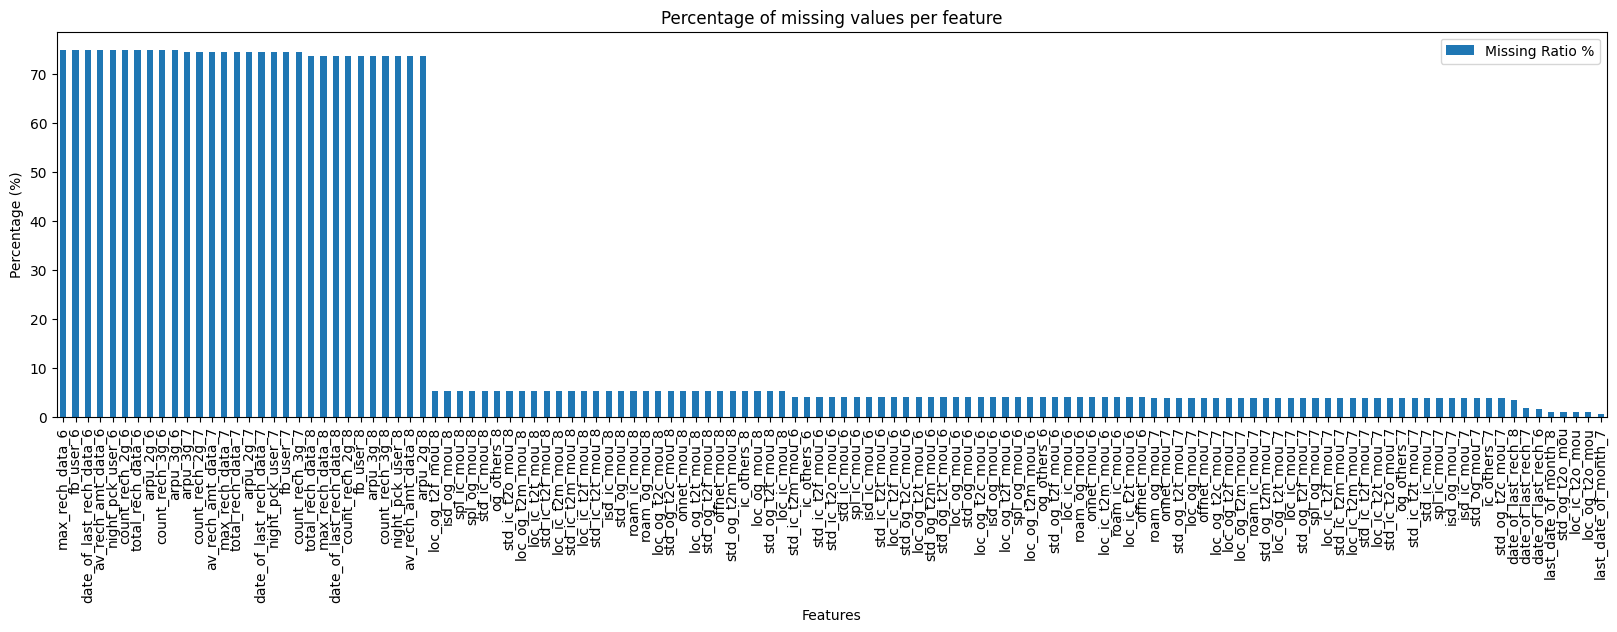

In [9]:
plot_width, plot_height = (20,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plot_missingVal(df)

**Remark:** we can obrserve that many features in our dataset contains missing values.

In [73]:
print("Description of the various acronyms in train data")
df_dict

Description of the various acronyms in train data


,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [35]:
def target_analysis(df):
  val = df.value_counts()
  churn = val.index
  count = val.values
  plt.figure(figsize=(4,4))
  plt.pie(count, labels=churn, autopct='%1.0f%%')
  plt.legend(loc='lower left', title="churn_probability")
  plt.title("Target analysis")
  plt.show()

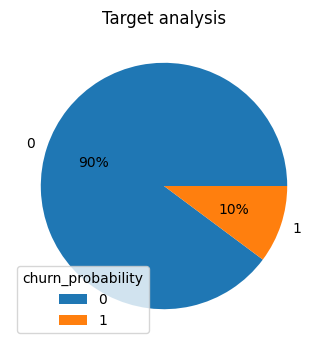

In [36]:
target_analysis(df['churn_probability'])

**Remark:** we can observe that our dataset is imbalanced. We need to perform resampling in order to handle that.

### **Distribution analysis**

In [30]:
#df.groupby('churn_probability').sum()
#df.columns.tolist()


In [10]:
df.groupby(['circle_id'], as_index=False).agg(mean_churn=("churn_probability","mean"))

,circle_id,mean_churn
0,109,0.101887


**Remark:** we can see that there is only few proportion of churn in the Telecom circle area to which the customer belongs to

In [19]:
df.groupby(['aon'], as_index=False).agg(mean_churn=("churn_probability","mean")).sort_values(by="aon", ascending=True)

,aon,mean_churn
0,180,0.229167
1,181,0.155738
2,182,0.238095
3,183,0.162162
4,184,0.231707
...,...,...
3450,4282,0.000000
3451,4299,0.000000
3452,4319,0.000000
3453,4321,0.000000


**Remark:** we can observe the customer with low aon (age on network) are more likely to churn

In [24]:
df.groupby(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8'], as_index=False).agg(mean_churn=("churn_probability","mean")).sort_values(by="mean_churn", ascending=False)

,monthly_2g_6,monthly_2g_7,monthly_2g_8,mean_churn
50,3,1,0,1.000000
59,4,0,0,1.000000
34,2,0,0,0.222222
18,1,0,0,0.136208
36,2,0,2,0.125000
...,...,...,...,...
30,1,3,0,0.000000
31,1,3,1,0.000000
33,1,3,3,0.000000
35,2,0,1,0.000000


In [26]:
df.groupby(['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'], as_index=False).agg(mean_churn=("churn_probability","mean")).sort_values(by="mean_churn", ascending=False)

,monthly_3g_6,monthly_3g_7,monthly_3g_8,mean_churn
148,4,3,1,1.0
177,6,2,0,1.0
163,5,0,0,1.0
166,5,2,2,1.0
165,5,2,1,0.5
...,...,...,...,...
81,2,1,6,0.0
86,2,2,4,0.0
87,2,2,5,0.0
89,2,3,1,0.0


**Remark:** Service schemes with validity equivalent to a month have an impact on the churn

In [29]:
df.groupby(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'], as_index=False).agg(mean_churn=("churn_probability","mean")).sort_values(by="mean_churn", ascending=False)

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,mean_churn
1669,2,9,0,0,0,0,1.0
3244,12,0,0,0,0,0,1.0
2707,7,7,0,1,1,0,1.0
1632,2,7,0,0,2,0,1.0
105,0,0,0,3,3,0,1.0
...,...,...,...,...,...,...,...
1234,1,6,8,0,0,0,0.0
1235,1,6,9,0,0,0,0.0
1236,1,6,9,1,3,2,0.0
1237,1,6,10,0,0,0,0.0


**Remark:** Service schemes with validity smaller than a month have an impact on the churn

### Boxplot

<Axes: >

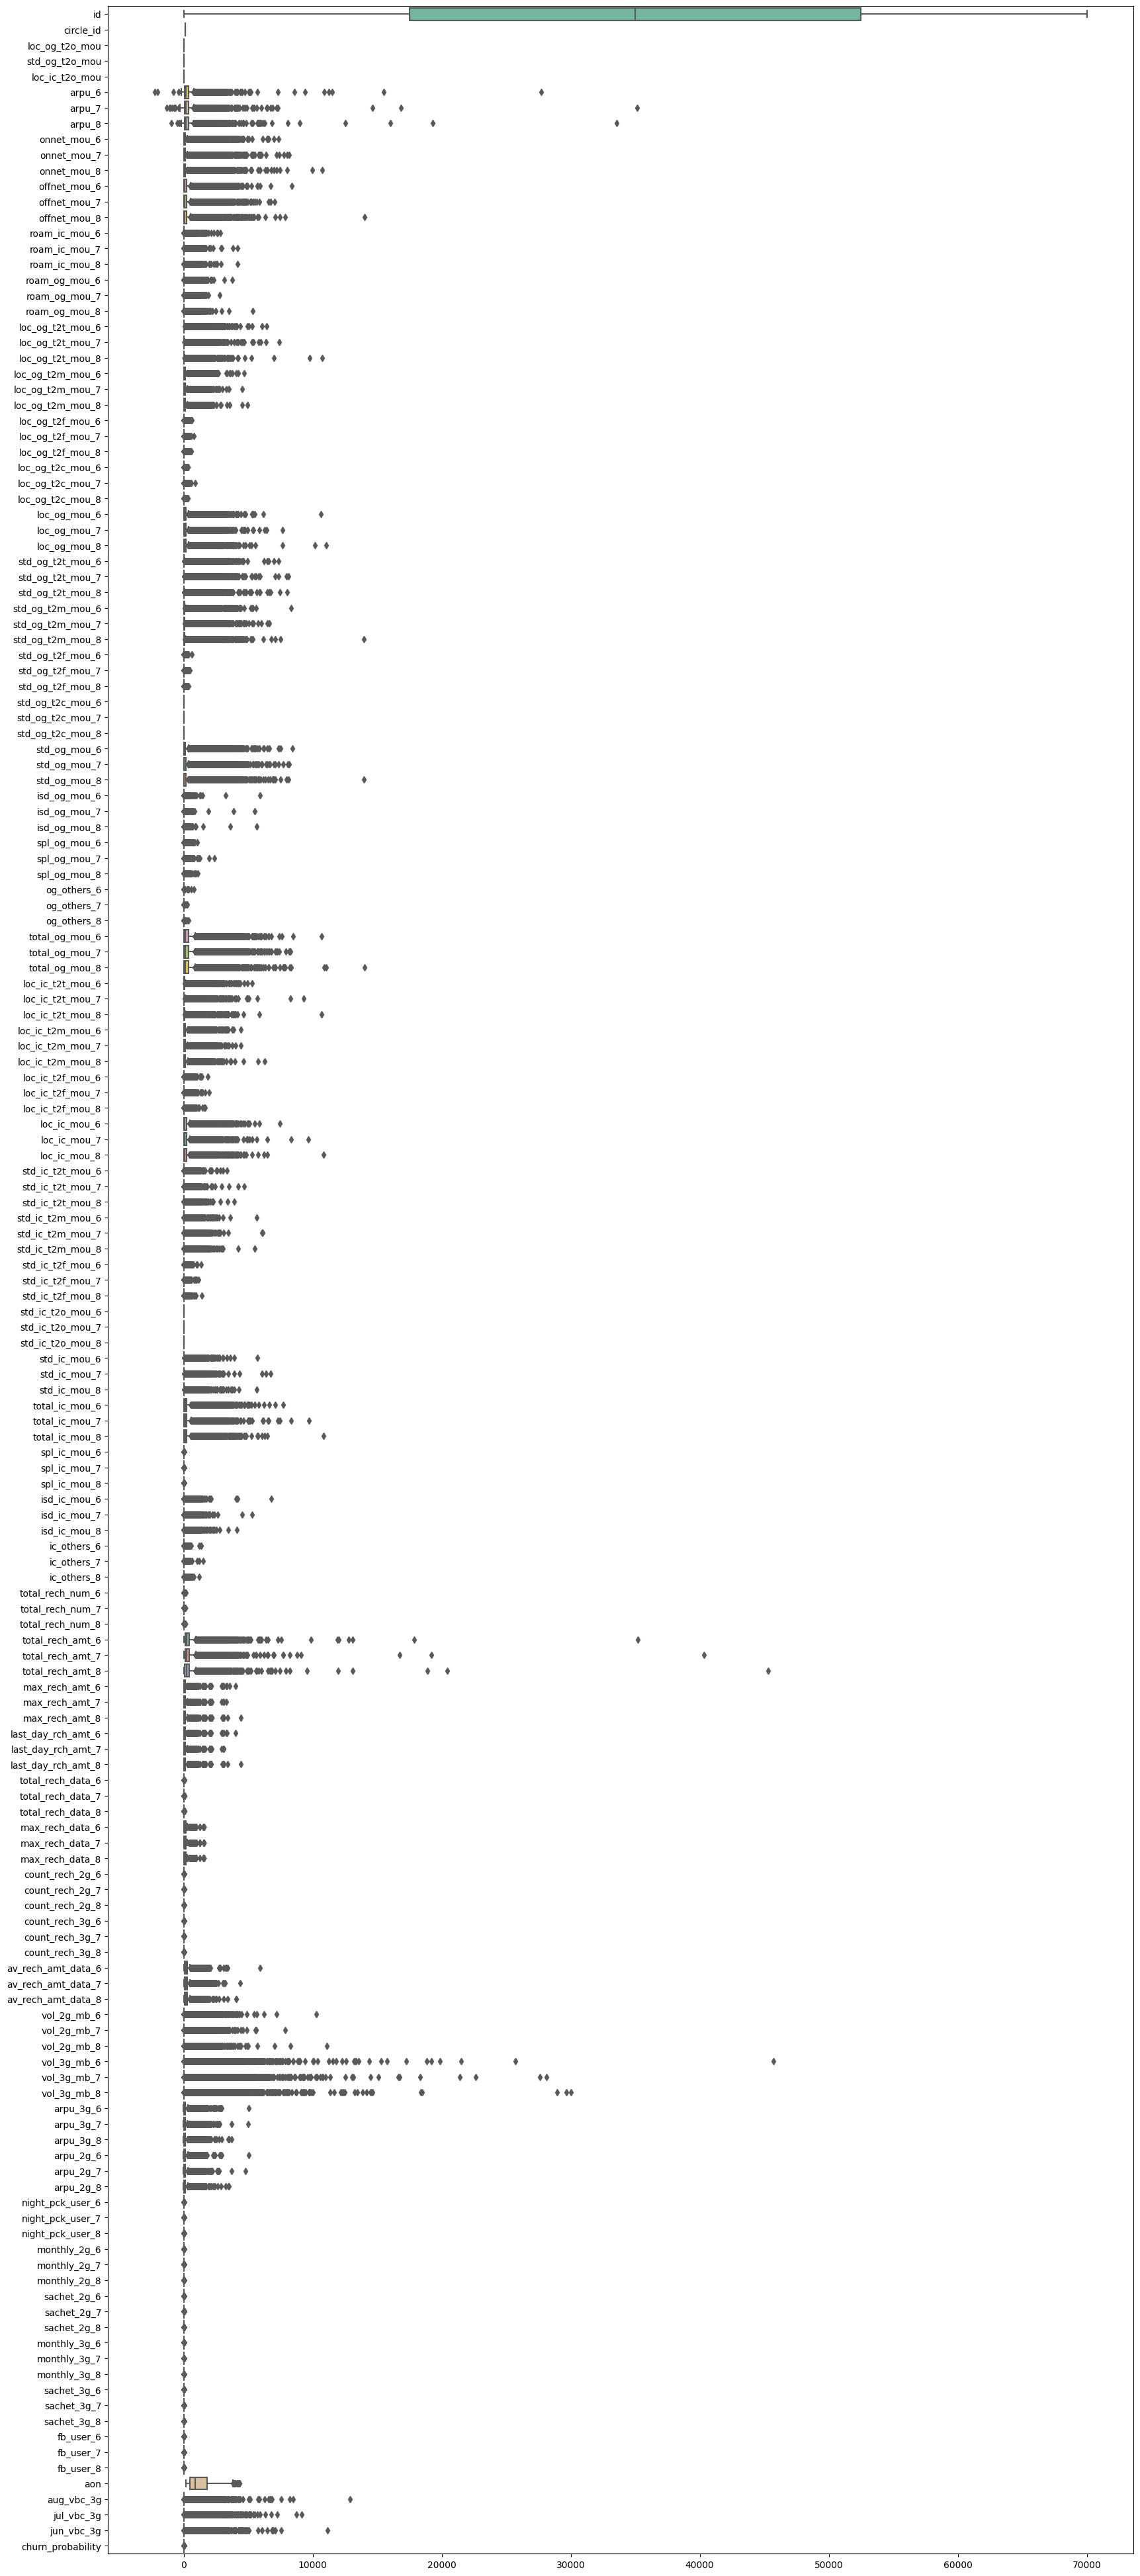

In [33]:
plot_width, plot_height = (20,50)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
sns.boxplot(data=df, orient="h", palette="Set2")

**Remark:** we can observe that feature such as arpu has a lot of outliers.

## **Data preprocessing**